In [1]:
# Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
plt.style.use("seaborn")

/tmp/ipykernel_70137/901731991.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


## 1. Reviewing and preprocessing the data

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
test_id = test["PassengerId"]

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

/tmp/ipykernel_70137/3962760923.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = train.groupby("Sex", as_index=False).sum()


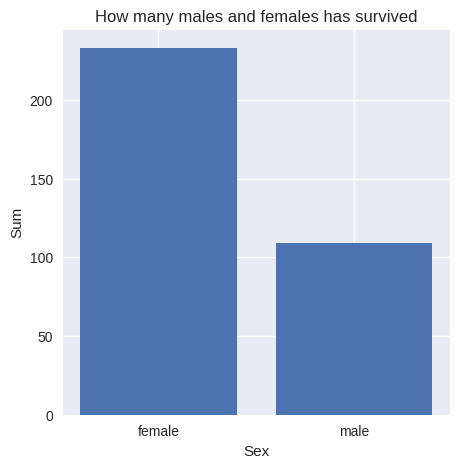

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))

data = train.groupby("Sex", as_index=False).sum()

ax.bar(data.Sex, data.Survived);
ax.set(title="How many males and females has survived", xlabel="Sex", ylabel="Sum");

In [7]:
def clean(data):
    data = data.drop(["Name", "Ticket", "PassengerId", "Cabin"], axis=1)
    data["Embarked"].fillna("U", inplace=True)
    data["Age"].fillna(data["Age"].median(), inplace=True)
    data["Fare"].fillna(data["Fare"].mean(), inplace=True)
    return data

In [8]:
train = clean(train)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
test = clean(test)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [10]:
encoder = preprocessing.LabelEncoder()
cols = ["Sex", "Embarked"]

for col in cols:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])
    print(encoder.classes_)

['female' 'male']
['C' 'Q' 'S' 'U']


## 2. Creating the model

In [11]:
clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
x = train.drop("Survived", axis=1)
y = train["Survived"]

In [13]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [16]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
416,2,0,34.0,1,1,32.5000,2
63,3,1,4.0,3,2,27.9000,2
723,2,1,50.0,0,0,13.0000,2
7,3,1,2.0,3,1,21.0750,2
180,3,0,28.0,8,2,69.5500,2
...,...,...,...,...,...,...,...
146,3,1,27.0,0,0,7.7958,2
286,3,1,30.0,0,0,9.5000,2
253,3,1,30.0,1,0,16.1000,2
430,1,1,28.0,0,0,26.5500,2


In [17]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
144,2,1,18.0,0,0,11.5000,2
32,3,0,28.0,0,0,7.7500,1
493,1,1,71.0,0,0,49.5042,0
842,1,0,30.0,0,0,31.0000,0
271,3,1,25.0,0,0,0.0000,2
...,...,...,...,...,...,...,...
781,1,0,17.0,1,0,57.0000,2
880,2,0,25.0,0,1,26.0000,2
872,1,1,33.0,0,0,5.0000,2
338,3,1,45.0,0,0,8.0500,2


In [18]:
clf.fit(x_train, y_train);

## 3. Evaluation

In [19]:
pred = clf.predict(x_test)
pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0])

In [20]:
clf.score(x_train, y_train)

0.9800249687890137

In [21]:
clf.score(x_test, y_test)

0.7777777777777778

## 4. Improvments

In [22]:
np.random.seed(42)
best = 0.0
est = 0
for i in range(10, 1000, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test: {clf.score(x_test, y_test) * 100 : .2f}%")
    if clf.score(x_test, y_test) > best:
        best = clf.score(x_test, y_test)
        est = i
    print("")
print(f"Best estimator is: {est}")
print(f"Best score is: {best * 100 : .2f}")

Trying model with 10 estimators...
Model accuracy on test:  73.33%

Trying model with 20 estimators...
Model accuracy on test:  74.44%

Trying model with 30 estimators...
Model accuracy on test:  73.33%

Trying model with 40 estimators...
Model accuracy on test:  77.78%

Trying model with 50 estimators...
Model accuracy on test:  78.89%

Trying model with 60 estimators...
Model accuracy on test:  77.78%

Trying model with 70 estimators...
Model accuracy on test:  77.78%

Trying model with 80 estimators...
Model accuracy on test:  77.78%

Trying model with 90 estimators...
Model accuracy on test:  77.78%

Trying model with 100 estimators...
Model accuracy on test:  76.67%

Trying model with 110 estimators...
Model accuracy on test:  78.89%

Trying model with 120 estimators...
Model accuracy on test:  77.78%

Trying model with 130 estimators...
Model accuracy on test:  77.78%

Trying model with 140 estimators...
Model accuracy on test:  78.89%

Trying model with 150 estimators...
Model a

In [23]:
clf = RandomForestClassifier(n_estimators=est).fit(x_train, y_train)

In [24]:
ans = clf.predict(test)

In [25]:
df = pd.DataFrame({"PassengerId": test_id.values, "Survived": ans})

In [26]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [27]:
df.to_csv("submission.csv", index=False)